In [7]:
from gensim.models.fasttext import FastText
from scipy.stats import spearmanr

In [10]:
model = FastText.load('/Users/gretagandolfi/Desktop/thesis/progetto/fasttext/rep.bin')
sim = open('/Users/gretagandolfi/Desktop/thesis/progetto/corpus/MEN/MEN_dataset_natural_form_full.txt', 'r')
vocab = model.wv.vocab
system = []
gold = []
for l in sim:
    fields = l.rstrip('\n').split()
    w1 = fields[0].replace("-n",".n")    
    w2 = fields[1].replace("-n",".n")
    score = float(fields[2])
    if w1 in vocab and w2 in vocab:
        cos = 1 - model.wv.distance(w1,w2)
        system.append(cos)
        gold.append(score)
        print(w1,w2,cos,score)

river water 0.5403844975193057 49.0
pregnancy pregnant 0.8944170757884329 48.0
beach sand 0.21927458040005143 48.0
black dark 0.1887797826794413 47.0
burn flame 0.5686175778134099 46.0
candy chocolate 0.6178847317183129 46.0
ocean water 0.7292364893475114 46.0
highway road 0.7542981910876312 46.0
truck vehicle 0.7194755414005986 45.0
shore water 0.48582982474795455 45.0
bride wedding 0.5408151729938028 45.0
aircraft flight 0.8001272381402007 45.0
pool swimming 0.7222034737104718 45.0
dirt dirty 0.8113125409109222 45.0
flight plane 0.499327313417655 45.0
smoke smoking 0.9280025028794167 45.0
river stream 0.26981471236449894 45.0
lake water 0.42047446510973285 45.0
show television 0.5518680489431271 44.0
flood water 0.4568002755405818 44.0
hand palm 0.508092543278958 44.0
apple fruit 0.5409512612141625 44.0
fire smoke 0.27710967370805584 44.0
shop shopping 0.7405540438711514 44.0
highway traffic 0.32807390940118686 44.0
coast harbor 0.5987727415909763 44.0
hill mountain 0.539060411132156

smile stop 0.6533804221482685 11.0
cigarette hotel 0.5326977653846984 11.0
country hanging 0.32348680015145503 11.0
dude hanging 0.4695156835492338 11.0
gold idea 0.5773615487314051 11.0
blue hand 0.46854484625663084 11.0
line temple 0.5323979880641232 11.0
camera rally 0.39258914732097505 11.0
happy sitting 0.673370633679969 11.0
bottle construction 0.3710707554939693 11.0
auto bright 0.49116127775291574 11.0
night sitting 0.40353624774368635 11.0
desert smoke 0.6012592314434273 11.0
hanging stop 0.7063111652707851 11.0
boxer pyramid 0.2186386262224025 11.0
feel hanging 0.4868573136294404 10.0
left sitting 0.42128452364911106 10.0
outfit rock 0.4696805148006793 10.0
green phone 0.17926237894206487 10.0
step wind 0.5286630468601101 10.0
lens storm 0.507706284686687 10.0
orange school 0.3387967349017199 10.0
shirt show 0.43718846031088 10.0
played rail 0.0953846151441422 10.0
house stop 0.46059369561546815 10.0
burn reading 0.329487507287447 10.0
cigarette living 0.4838897918394264 10.0

In [9]:
print("SPEARMAN:",spearmanr(system,gold))

SPEARMAN: SpearmanrResult(correlation=0.21294908139631397, pvalue=1.57366788905501e-07)


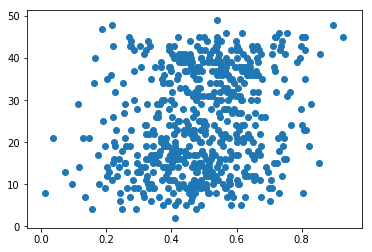

In [13]:
import matplotlib.pyplot as plt
plt.scatter(system,gold)